### Imports

In [1]:
from utils import dataset_from_file,apriori,format_output
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Inputs

In [2]:
delimeter = ","
T = dataset_from_file("datasets/dataset.txt", delimeter)
eps = 3
verbose = False

###  Processing...

In [3]:
res = apriori(T,eps,verbose)
format_output(res)

element         value    support    confiance 
  5               6       0.857      0.857
  1               6       0.857      0.857
  1-5             5       0.714      1.000
  2               5       0.714      0.714
  2-1             4       0.571      1.200
  2-5             4       0.571      1.200
  2-5-1           3       0.429      1.500
  5-3             3       0.429      0.500
  3               3       0.429      0.429


### Vizualisation

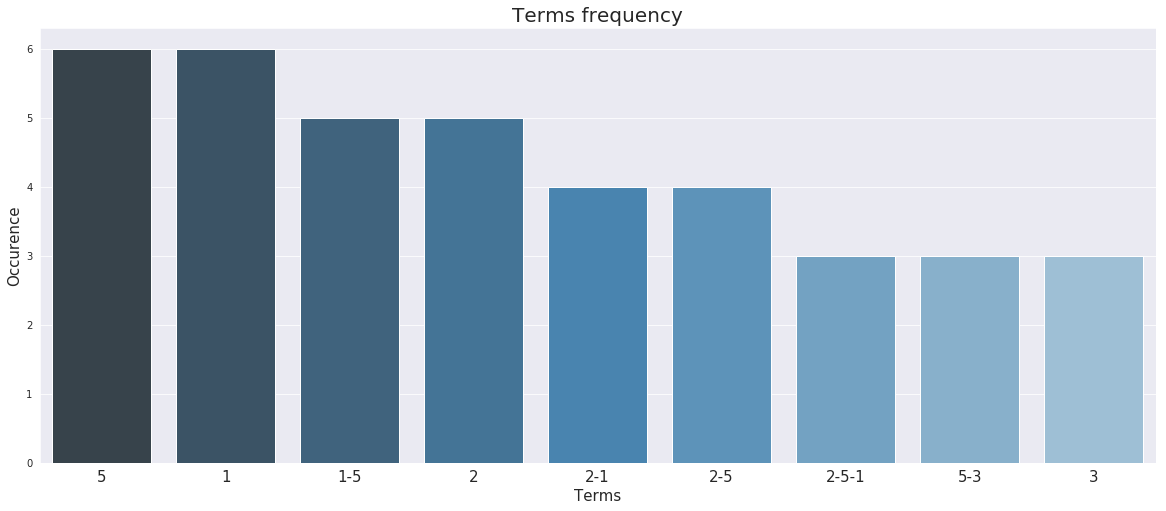

In [4]:
plt.figure(figsize=(20,8))
ax = sns.barplot(
    x=[x[0] for x in res], 
    y=[x[1]['value'] for x in res], 
    palette="Blues_d"); 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_ylabel(ax.get_ylabel(), fontsize=15)
ax.set_title('Terms frequency', fontsize=20)
ax.set_ylabel('Occurence', fontsize=15)
ax.set_xlabel('Terms', fontsize=15); 